In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy.stats import gaussian_kde, norm
from sklearn.mixture import GaussianMixture
import tensorflow as tf
from utils_f4f import CustomEarlyStopping, cnn_aa_model,AA_hotencoding ,heatmap, si_format



#### Data_preparetion

In [2]:
df_all = pd.read_csv('../data/prediction_data_p1.tsv',delimiter='\t')
df_all = df_all.rename(columns={'aa':'AA_sequence'})
df_all['nor_package'] = 0
df_all.head()


,AA_sequence,nor_package
0,GANTIIG,0
1,SWDMDGD,0
2,LVSSSNI,0
3,WMGDESK,0
4,DKQGAKF,0


#### AA-sequence-nor_package

In [3]:
aa_nor_package = df_all[['AA_sequence', 'nor_package']][::500]
aa_nor_package = aa_nor_package.sort_values(by='nor_package')

train_size = 0
validation_size = 50
train, validate, test = np.split(aa_nor_package.sample(frac=1),  [train_size, train_size+validation_size])
# Hot Encoding

test_x =  np.asarray([AA_hotencoding(variant) for variant in test['AA_sequence']])
test_y = test['nor_package']


array = 'AA_sequence'

##### First model(1st_aa_nor_package) 

In [35]:
model_outdir = 'pretrain\model_1st_cnn_aa_nor_package.h5'
model_outpath = model_outdir
model = tf.keras.models.load_model(model_outdir)
y = model.predict(test_x)
test['nor_package'] = pd.DataFrame(y).values
test.to_csv('../results/cnn/1st_results/pred/1st_cnn_aa_nor_package_prediction.csv',index=False)

799/799 [==============================] - 2s 2ms/step


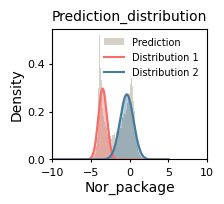

In [36]:
nor_package = test['nor_package']
data = np.array(nor_package) 
data = data.reshape(-1, 1)  # Convert the data into a column vector

# Fit the data using GaussianMixture
n_components = 2 # Set the number of components for the hybrid model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Get the mean and covariance matrix for each component
means = gmm.means_
covariances = gmm.covariances_

# Generate the fitted distribution
x = np.linspace(-10, 5, 10000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

fig,ax = plt.subplots(figsize=(2,1.7),dpi=100)
# Plot the raw data and the distribution after fitting
plt.hist(data, bins=100, density=True, alpha=0.6, color = '#BAB3A3',label='Prediction')

# 绘制每个分量的正态分布
for i in range(n_components):
    component = np.exp(-(x - means[i]) ** 2 / (2 * covariances[i]))
    component /= np.sqrt(2 * np.pi * covariances[i])
    component *= gmm.weights_[i]
    if i == 0:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#F66E68', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#F66E68', alpha=0.4)
    else:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#457B9D', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#457B9D', alpha=0.4)


plt.title('Prediction_distribution',fontsize=10)
ax.tick_params(axis='both', which='both', length=2,labelsize=8)
ax.set_xticks([-10,-5,0,5,10]); 
ax.set_xlim([-10,10])
plt.ylabel('Density',labelpad=2,fontsize=10)
plt.xlabel('Nor_package',labelpad=2,fontsize=10)
plt.legend(fontsize=7,frameon=False,loc='best')
fig.savefig('../results/cnn/1st_results/pred/1st_cnn_aa_nor_package_prediction_distribution.pdf',dpi=300,bbox_inches='tight')
plt.show()

##### Second model(2nd_aa_nor_package) 

In [38]:
model_outdir = 'pretrain\model_2nd_cnn_aa_nor_package.h5'
model_outpath = model_outdir
model = tf.keras.models.load_model(model_outdir)
y = model.predict(test_x)
test['nor_package'] = pd.DataFrame(y).values
test.to_csv('../results/cnn/2nd_results/pred/2nd_cnn_aa_nor_package_prediction.csv',index=False)

799/799 [==============================] - 2s 2ms/step


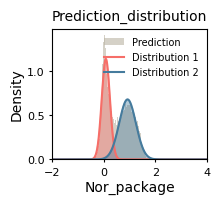

In [41]:
nor_package = test['nor_package']
data = np.array(nor_package) 
data = data.reshape(-1, 1)  # Convert the data into a column vector

# Fit the data using GaussianMixture
n_components = 2 # Set the number of components for the hybrid model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Get the mean and covariance matrix for each component
means = gmm.means_
covariances = gmm.covariances_

# Generate the fitted distribution
x = np.linspace(-10, 5, 10000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

fig,ax = plt.subplots(figsize=(2,1.7),dpi=100)
# Plot the raw data and the distribution after fitting
plt.hist(data, bins=100, density=True, alpha=0.6, color = '#BAB3A3',label='Prediction')

# 绘制每个分量的正态分布
for i in range(n_components):
    component = np.exp(-(x - means[i]) ** 2 / (2 * covariances[i]))
    component /= np.sqrt(2 * np.pi * covariances[i])
    component *= gmm.weights_[i]
    if i == 0:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#F66E68', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#F66E68', alpha=0.4)
    else:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#457B9D', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#457B9D', alpha=0.4)


plt.title('Prediction_distribution',fontsize=10)
ax.tick_params(axis='both', which='both', length=2,labelsize=8)
ax.set_xticks([-2,0,2,4]); 
ax.set_xlim([-2,4])
plt.ylabel('Density',labelpad=2,fontsize=10)
plt.xlabel('Nor_package',labelpad=2,fontsize=10)
plt.legend(fontsize=7,frameon=False,loc='best')
fig.savefig('../results/cnn/2nd_results/pred/2nd_vae_aa_nor_package_prediction_distribution.pdf',dpi=300,bbox_inches='tight')
plt.show()

#### aa-nor_transduction

##### First model(1st_seq_nor_transduction) 

In [48]:
model_outdir = 'pretrain\model_1st_cnn_aa_nor_transduction.h5'
model_outpath = model_outdir
model = tf.keras.models.load_model(model_outdir)
y = model.predict(test_x)
test['nor_package'] = pd.DataFrame(y).values
test.to_csv('../results/cnn/1st_results/pred/1st_cnn_aa_nor_transduction.csv',index=False)


799/799 [==============================] - 2s 2ms/step


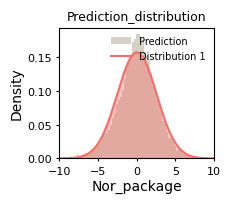

In [49]:
nor_package = test['nor_package']
data = np.array(nor_package) 
data = data.reshape(-1, 1)  # Convert the data into a column vector

# Fit the data using GaussianMixture
n_components = 1 # Set the number of components for the hybrid model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Get the mean and covariance matrix for each component
means = gmm.means_
covariances = gmm.covariances_

# Generate the fitted distribution
x = np.linspace(-10, 10, 10000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

fig,ax = plt.subplots(figsize=(2,1.7),dpi=100)
# Plot the raw data and the distribution after fitting
plt.hist(data, bins=100, density=True, alpha=0.6, color = '#BAB3A3',label='Prediction')

# 绘制每个分量的正态分布
for i in range(n_components):
    component = np.exp(-(x - means[i]) ** 2 / (2 * covariances[i]))
    component /= np.sqrt(2 * np.pi * covariances[i])
    component *= gmm.weights_[i]
    if i == 0:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#F66E68', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#F66E68', alpha=0.4)
    else:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#457B9D', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#457B9D', alpha=0.4)


plt.title('Prediction_distribution',fontsize=9)
ax.tick_params(axis='both', which='both', length=2,labelsize=8)
ax.set_xticks([-10,-5,0,5,10]); 
ax.set_xlim([-10,10])
plt.ylabel('Density',labelpad=2,fontsize=10)
plt.xlabel('Nor_package',labelpad=2,fontsize=10)
plt.legend(fontsize=7,frameon=False,loc='best')
fig.savefig('../results/cnn/1st_results/pred/1st_cnn_aa_transduction_prediction_distribution.pdf',dpi=300,bbox_inches='tight')
plt.show()

##### Second model(2nd_aa_nor_transduction) 

In [50]:
model_outdir = 'pretrain\model_2nd_cnn_aa_nor_transduction.h5'
model_outpath = model_outdir
model = tf.keras.models.load_model(model_outdir)
y = model.predict(test_x)
test['nor_package'] = pd.DataFrame(y).values
test.to_csv('../results/cnn/2nd_results/pred/2nd_cnn_aa_nor_transduction.csv',index=False)


799/799 [==============================] - 2s 2ms/step


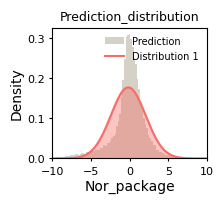

In [51]:
nor_package = test['nor_package']
data = np.array(nor_package) 
data = data.reshape(-1, 1)  # Convert the data into a column vector

# Fit the data using GaussianMixture
n_components = 1 # Set the number of components for the hybrid model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Get the mean and covariance matrix for each component
means = gmm.means_
covariances = gmm.covariances_

# Generate the fitted distribution
x = np.linspace(-10, 10, 10000)
x = x.reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

fig,ax = plt.subplots(figsize=(2,1.7),dpi=100)
# Plot the raw data and the distribution after fitting
plt.hist(data, bins=100, density=True, alpha=0.6, color = '#BAB3A3',label='Prediction')

# 绘制每个分量的正态分布
for i in range(n_components):
    component = np.exp(-(x - means[i]) ** 2 / (2 * covariances[i]))
    component /= np.sqrt(2 * np.pi * covariances[i])
    component *= gmm.weights_[i]
    if i == 0:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#F66E68', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#F66E68', alpha=0.4)
    else:
        ax.plot(x, component, '-', label=f'Distribution {i + 1}', color='#457B9D', alpha=1)
        ax.fill_between(x.flatten(), 0, component.flatten(), color='#457B9D', alpha=0.4)


plt.title('Prediction_distribution',fontsize=9)
ax.tick_params(axis='both', which='both', length=2,labelsize=8)
ax.set_xticks([-10,-5,0,5,10]); 
ax.set_xlim([-10,10])
plt.ylabel('Density',labelpad=2,fontsize=10)
plt.xlabel('Nor_package',labelpad=2,fontsize=10)
plt.legend(fontsize=7,frameon=False,loc='best')
fig.savefig('../results/cnn/2nd_results/pred/2nd_cnn_aa_transduction_prediction_distribution.pdf',dpi=300,bbox_inches='tight')
plt.show()